## Making predictions

#### Predicting house prices
Perhaps the most useful feature of statistical models like linear regression is that you can make predictions. That is, you specify values for each of the explanatory variables, feed them to the model, and get a prediction for the corresponding response variable. The code flow is as follows.

explanatory_data = pd.DataFrame({"explanatory_var": list_of_values})<br>
predictions = model.predict(explanatory_data)<br>
prediction_data = explanatory_data.assign(response_var=predictions)<br>
Here, you'll make predictions for the house prices in the Taiwan real estate dataset.

taiwan_real_estate is available. The fitted linear regression model of house price versus number of convenience stores is available as mdl_price_vs_conv. For future exercises, when a model is available, it will also be fitted.

In [31]:
# Import numpy with alias np and pandas with alias pd

import pandas as pd
import numpy as np

# Import the ols function
from statsmodels.formula.api import ols

# import relavant dataset
taiwan_real_estate = pd.read_csv("taiwan_real_estate2.csv")

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Create the explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0,11)})

# Print it
print(explanatory_data, "\n")

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Print it
print(price_twd_msq)

    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10 

0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64


In [32]:
# Import numpy with alias np
import numpy as np

# Create explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv.predict(explanatory_data))

# Print the result
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


Premium predicting! Having the predictions in a DataFrame will make it easier to visualize them.

#### Visualizing predictions
The prediction DataFrame you created contains a column of explanatory variable values and a column of response variable values. That means you can plot it on the same scatter plot of response versus explanatory data values.

prediction_data is available. The code for the plot you created using sns.regplot() in Chapter 1 is shown.

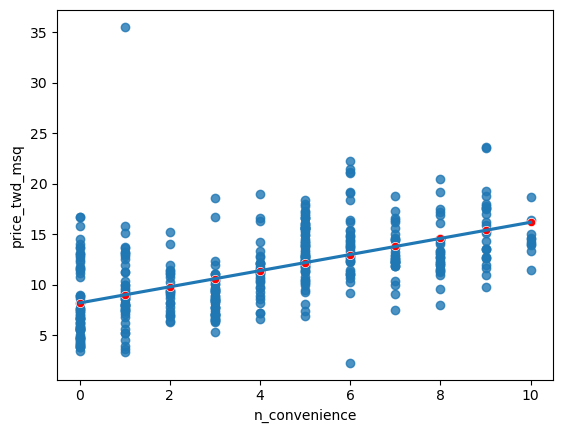

In [33]:
# import matplotlib and seaborn with aliases
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)

# Add a scatter plot layer to the regplot
sns.scatterplot(x = "n_convenience",
                y = "price_twd_msq",
                data = prediction_data,
                color="red")

# Show the layered plot
plt.show()

Perfect prediction plotting! Naturally, the predicted points lie on the trend line.

#### The limits of prediction
In the last exercise, you made predictions on some sensible, could-happen-in-real-life, situations. That is, the cases when the number of nearby convenience stores were between zero and ten. To test the limits of the model's ability to predict, try some impossible situations.

Use the console to try predicting house prices from mdl_price_vs_conv when there are -1 convenience stores. Do the same for 2.5 convenience stores. What happens in each case?

mdl_price_vs_conv is available.

In [34]:
# Define a DataFrame impossible
impossible = pd.DataFrame({"n_convenience": [-1, 2.5]})
mdl_price_vs_conv.predict(impossible)

0     7.426158
1    10.219437
dtype: float64

#### Question
Try making predictions on your two impossible cases. What happens?

a.The model throws an error because these cases are impossible in real life.<br>
b.The model throws a warning because these cases are impossible in real life.<br>
<strong>c.The model successfully gives a prediction about cases that are impossible in real life.</strong><br>
d.The model throws an error for -1 stores because it violates the assumptions of a linear regression. 2.5 stores gives a successful prediction.<br>
e.The model throws an error for 2.5 stores because it violates the assumptions of a linear regression. -1 stores gives a successful prediction.

Legendary limit detection! Linear models don't know what is possible or not in real life. That means that they can give you predictions that don't make any sense when applied to your data. You need to understand what your data means in order to determine whether a prediction is nonsense or not.

#### Extracting model elements
The model object created by ols() contains many elements. In order to perform further analysis on the model results, you need to extract its useful bits. The model coefficients, the fitted values, and the residuals are perhaps the most important pieces of the linear model object.

mdl_price_vs_conv is available.

In [35]:
# Print the model parameters of mdl_price_vs_conv
print(mdl_price_vs_conv.params, "\n")

# Print the fitted values of mdl_price_vs_conv
print(mdl_price_vs_conv.fittedvalues, "\n")

# Print the residuals of mdl_price_vs_conv
print(mdl_price_vs_conv.resid, "\n")

# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())

Intercept        8.224237
n_convenience    0.798080
dtype: float64 

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64 

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64 

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           3.41e-37
Time:                        16:16:58   Log-Likelihood:                -1091.1
No. Observations:                 

Marvelous model manipulation! Working with individual pieces of the model is often more useful than working with the whole model object at once.

#### Manually predicting house prices
You can manually calculate the predictions from the model coefficients. When making predictions in real life, it is better to use .predict(), but doing this manually is helpful to reassure yourself that predictions aren't magic - they are simply arithmetic.

In fact, for a simple linear regression, the predicted value is just the intercept plus the slope times the explanatory variable.

$\text{response} = \text{intercept} + \text{slope} * \text{explanatory}$


mdl_price_vs_conv and explanatory_data are available.

In [36]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params
print("Coefficients:", coeffs, "\n")

# Get the intercept
intercept = coeffs[0]
print("Intercept:", intercept, "\n")

# Get the slope
slope = coeffs[1] #it is a called as n_convenience in output
print("Slope:", slope, "\n")

# Manually calculate the predictions
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq, "\n")

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

Coefficients: Intercept        8.224237
n_convenience    0.798080
dtype: float64 

Intercept: 8.224237452790346 

Slope: 0.7980797166125065 

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035 

    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


/var/folders/99/dtvgdtbj5x7g55qvsgpd_j780000gn/T/ipykernel_14843/517940051.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = coeffs[0]
/var/folders/99/dtvgdtbj5x7g55qvsgpd_j780000gn/T/ipykernel_14843/517940051.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = coeffs[1] #it is a called as n_convenience in output


Magic manual prediction! For simple linear regression, the prediction just involves one addition and one multiplication.

#### Home run!
Regression to the mean is an important concept in many areas, including sports.

Here you can see a dataset of baseball batting data in 2017 and 2018. Each point represents a player, and more home runs are better. A naive prediction might be that the performance in 2018 is the same as the performance in 2017. That is, a linear regression would lie on the "y equals x" line.

Explore the plot and make predictions. What does regression to the mean say about the number of home runs in 2018 for a player who was very successful in 2017?

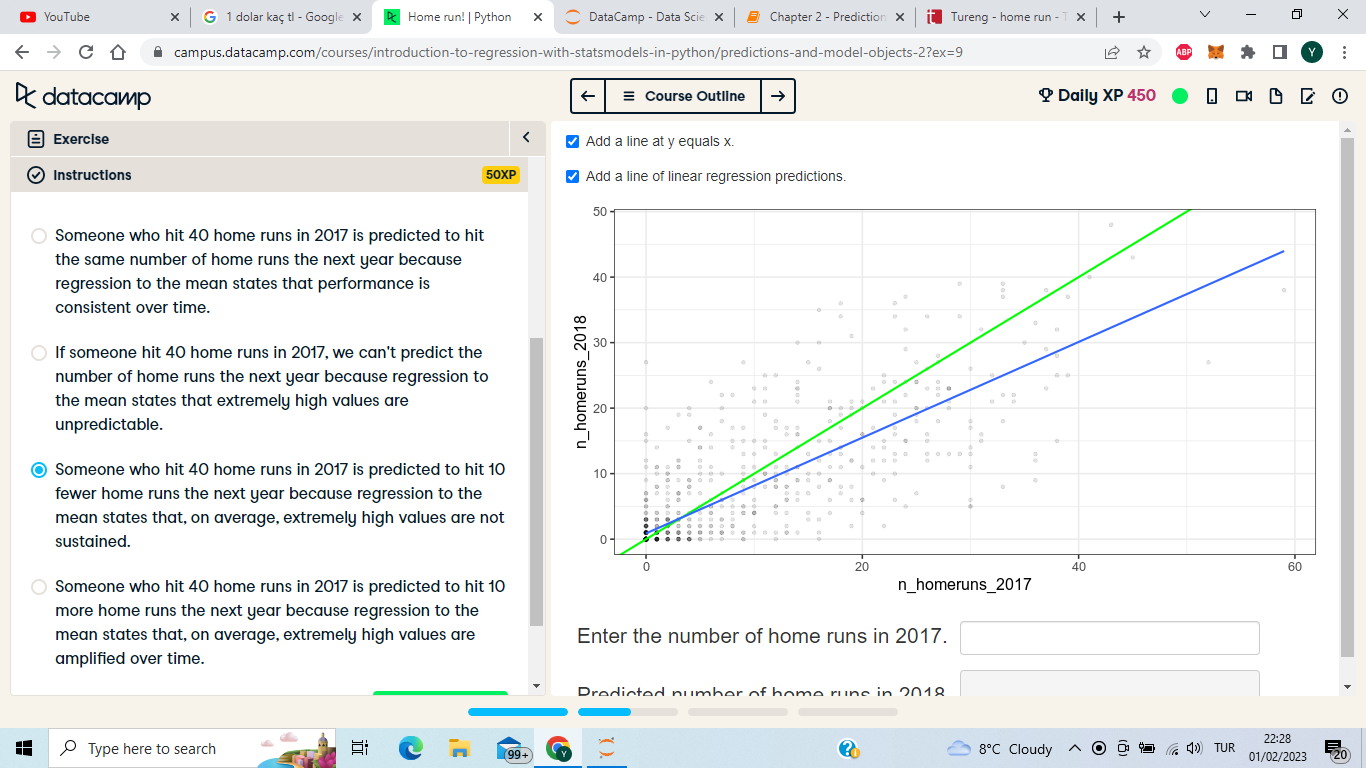

Magnificent regression to the mean! Due to regression to the mean, it's common that one player or team that does really well one year, doesn't do as well the next. Likewise players or teams that perform very badly one year do better the next year.

#### Plotting consecutive portfolio returns
Regression to the mean is also an important concept in investing. Here you'll look at the annual returns from investing in companies in the Standard and Poor 500 index (S&P 500), in 2018 and 2019.

The sp500_yearly_returns dataset contains three columns:

variable	meaning
symbol	Stock ticker symbol uniquely identifying the company.
return_2018	A measure of investment performance in 2018.
return_2019	A measure of investment performance in 2019.
A positive number for the return means the investment increased in value; negative means it lost value.

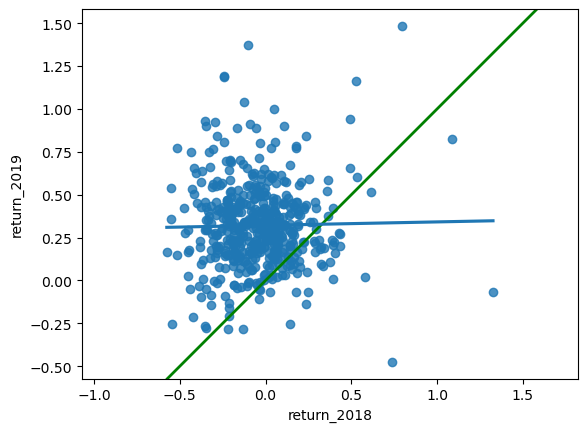

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sp500_yearly_returns = pd.read_csv("sp500_yearly_returns.csv")

# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x="return_2018",
            y="return_2019",
            data=sp500_yearly_returns,
            ci=None)

# Set the axes so that the distances along the x and y axes look the same
plt.axis("equal")

# Show the plot
plt.show()

Super scatter plotting! The regression trend line looks very different to the y equals x line. As the financial advisors say, "Past performance is no guarantee of future results."

#### Modeling consecutive returns
Let's quantify the relationship between returns in 2019 and 2018 by running a linear regression and making predictions. By looking at companies with extremely high or extremely low returns in 2018, we can see if their performance was similar in 2019.

sp500_yearly_returns is available and ols() is loaded.

In [38]:
# Run a linear regression on return_2019 vs. return_2018 using sp500_yearly_returns
mdl_returns = ols("return_2019 ~ return_2018", sp500_yearly_returns).fit()

# Print the parameters
mdl_returns.params

Intercept      0.321321
return_2018    0.020069
dtype: float64

In [39]:
mdl_returns = ols("return_2019 ~ return_2018", data=sp500_yearly_returns).fit()

# Create a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({"return_2018": [-1,0,1]})

# Use mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))

0    0.301251
1    0.321321
2    0.341390
dtype: float64


Incredible investment predictions! Investments that gained a lot in value in 2018 on average gained only a small amount in 2019. Similarly, investments that lost a lot of value in 2018 on average also gained a small amount in 2019.

## Transforming variables

#### Transforming the explanatory variable
If there is no straight-line relationship between the response variable and the explanatory variable, it is sometimes possible to create one by transforming one or both of the variables. Here, you'll look at transforming the explanatory variable.

You'll take another look at the Taiwan real estate dataset, this time using the distance to the nearest MRT (metro) station as the explanatory variable. You'll use code to make every commuter's dream come true: shortening the distance to the metro station by taking the square root. Take that, geography!

taiwan_real_estate is available.

In [40]:
model = ols("price_twd_msq ~ dist_to_mrt_m", data = taiwan_real_estate).fit()
model.params

Intercept        13.873352
dist_to_mrt_m    -0.002197
dtype: float64

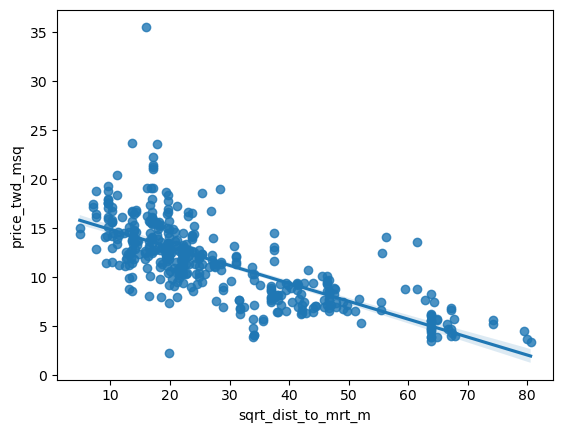

In [41]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

plt.figure()

# Plot using the transformed variable
sns.regplot(x = "sqrt_dist_to_mrt_m", y = "price_twd_msq", data = taiwan_real_estate)
plt.show()

In [42]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", taiwan_real_estate).fit()

# Print the parameters
mdl_price_vs_dist.params

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64

In [43]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2), "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


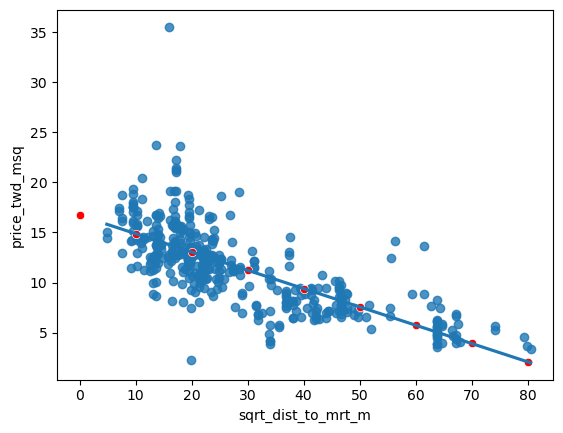

In [44]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use this explanatory data
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Use mdl_price_vs_dist to predict explanatory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=prediction_data, color="red")
plt.show()

You transform like a robot in disguise! By transforming the explanatory variable, the relationship with the response variable became linear, and so a linear regression became an appropriate model.

#### Transforming the response variable too
The response variable can be transformed too, but this means you need an extra step at the end to undo that transformation. That is, you "back transform" the predictions.

In the video, you saw the first step of the digital advertising workflow: spending money to buy ads, and counting how many people see them (the "impressions"). The next step is determining how many people click on the advert after seeing it.

ad_conversion is available as a pandas DataFrame.

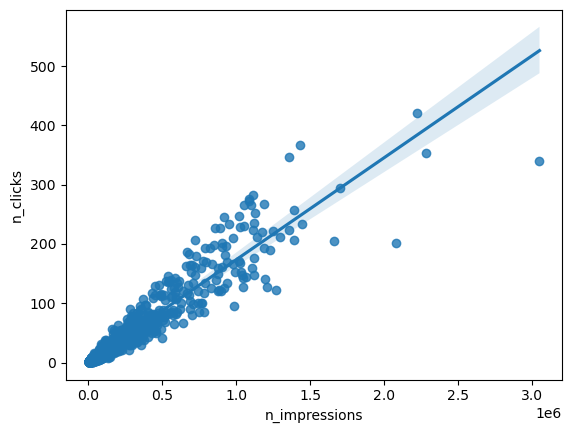

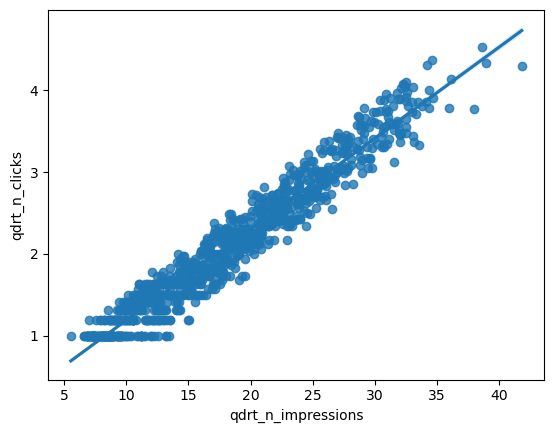

In [46]:
import pandas as pd
ad_conversion = pd.read_csv("ad_conversion.csv")

plt.figure()

#plot data
sns.regplot(x = "n_impressions", y = "n_clicks", data = ad_conversion)
plt.show()

# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"]**0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"]**0.25


# Plot using the transformed variables
sns.regplot(x = "qdrt_n_impressions", y = "qdrt_n_clicks", data = ad_conversion)
plt.show()

In [47]:
# Run a linear regression of your transformed variables
mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", ad_conversion).fit()

In [48]:
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['ci']
  warnings.warn(msg, ValueWarning)


Terrific transformation! Since the response variable has been transformed, you'll now need to back-transform the predictions to correctly interpret your results.

#### Back transformation
In the previous exercise, you transformed the response variable, ran a regression, and made predictions. But you're not done yet! In order to correctly interpret and visualize your predictions, you'll need to do a back-transformation.

prediction_data, which you created in the previous exercise, is available.

In [49]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"]**4
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks    n_clicks
0            0.000000            0.0       0.071748    0.000026
1           26.591479       500000.0       3.037576   85.135121
2           31.622777      1000000.0       3.598732  167.725102
3           34.996355      1500000.0       3.974998  249.659131
4           37.606031      2000000.0       4.266063  331.214159
5           39.763536      2500000.0       4.506696  412.508546
6           41.617915      3000000.0       4.713520  493.607180


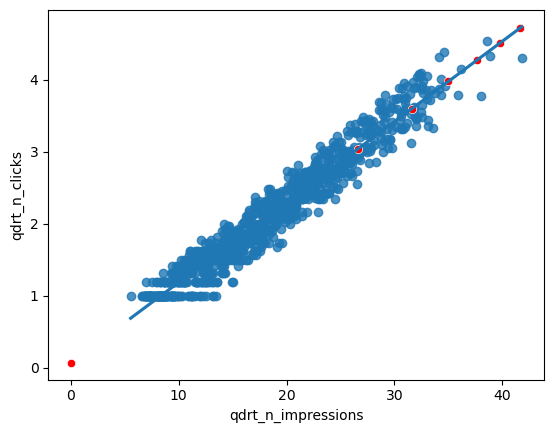

In [50]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x = "qdrt_n_impressions", y = "qdrt_n_clicks", data = prediction_data, color="red")
plt.show()

Brilliant back transformation! Notice that your back-transformed predictions nicely follow the trend line and allow you to make more accurate predictions.